In [3]:
import os
import numpy as np
import cv2
import sys
%matplotlib inline
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


markers3D_blue_R_b_mm
[[33, 477.0, -48], [33, -477.0, -48], [967, -477.0, -48], [967, 477.0, -48]]
markers3D_ir_R_b_mm
[[23, 477.0, -48], [23, -477.0, -48], [977, -477.0, -48], [977, 477.0, -48]]


Text(0.5, 1.0, 'markers coordinates in the Board Coordinates system')

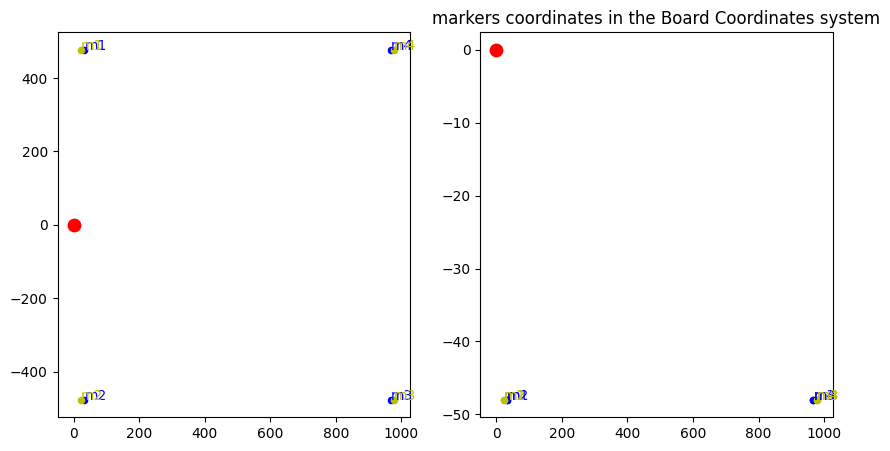

In [4]:
# alignment board definition
d_Z_board_mm = 48
board_X_mm = 1000
board_Y_mm = 1000
d_X1_mm = 23
d_X2_mm = 23
d_Y1_mm = 23
d_Y2_mm = 33


# define the marker coordinates in the local board coordinate system (R_b)
# blue leds
# x[mm], y[mm], z[mm]
m1_blue_R_b_mm = [d_Y2_mm, board_X_mm*0.5-d_X1_mm, -d_Z_board_mm]
m2_blue_R_b_mm = [d_Y2_mm, -(board_X_mm*0.5-d_X1_mm), -d_Z_board_mm]
m3_blue_R_b_mm = [board_Y_mm-d_Y2_mm, -(board_X_mm*0.5-d_X1_mm), -d_Z_board_mm]
m4_blue_R_b_mm = [board_Y_mm-d_Y2_mm, board_X_mm*0.5-d_X1_mm, -d_Z_board_mm]

markers3D_blue_R_b_mm = [m1_blue_R_b_mm,
                         m2_blue_R_b_mm,
                         m3_blue_R_b_mm,
                         m4_blue_R_b_mm]
# ir leds
m1_ir_R_b_mm = [d_Y1_mm, board_X_mm*0.5-d_X1_mm, -d_Z_board_mm]
m2_ir_R_b_mm = [d_Y1_mm, -(board_X_mm*0.5-d_X1_mm), -d_Z_board_mm]
m3_ir_R_b_mm = [board_Y_mm-d_Y1_mm, -(board_X_mm*0.5-d_X1_mm), -d_Z_board_mm]
m4_ir_R_b_mm = [board_Y_mm-d_Y1_mm, board_X_mm*0.5-d_X1_mm, -d_Z_board_mm]

markers3D_ir_R_b_mm = [ m1_ir_R_b_mm,
                        m2_ir_R_b_mm,
                        m3_ir_R_b_mm,
                        m4_ir_R_b_mm    ]

print('markers3D_blue_R_b_mm')
print(markers3D_blue_R_b_mm)
print('markers3D_ir_R_b_mm')
print(markers3D_ir_R_b_mm)

def plot_markers(markers, ax1, ax2=None, color='b'):
    for i,marker in enumerate(markers):
        ax1.scatter(marker[0], marker[1], s=20, c=color)
        ax1.text(marker[0], marker[1], f'm{i+1}', c=color)
        if ax2 is not None:
            ax2.scatter(marker[0], marker[2], s=20, c=color)
            ax2.text(marker[0], marker[2], f'm{i+1}', c=color)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# top view
ax1.scatter(0, 0, s=80, c='r')
ax2.scatter(0, 0, s=80, c='r')
plot_markers(markers3D_blue_R_b_mm, ax1, ax2)
plot_markers(markers3D_ir_R_b_mm, ax1, ax2, color='y')
plt.title('markers coordinates in the Board Coordinates system')

markers3D_blue_R_car_mm
[[3808.  477.  -48.]
 [3808. -477.  -48.]
 [4742. -477.  -48.]
 [4742.  477.  -48.]]
markers3D_ir_R_car_mm
[[3798.  477.  -48.]
 [3798. -477.  -48.]
 [4752. -477.  -48.]
 [4752.  477.  -48.]]


Text(0.5, 1.0, 'markers coordinates in the Car Coordinates system')

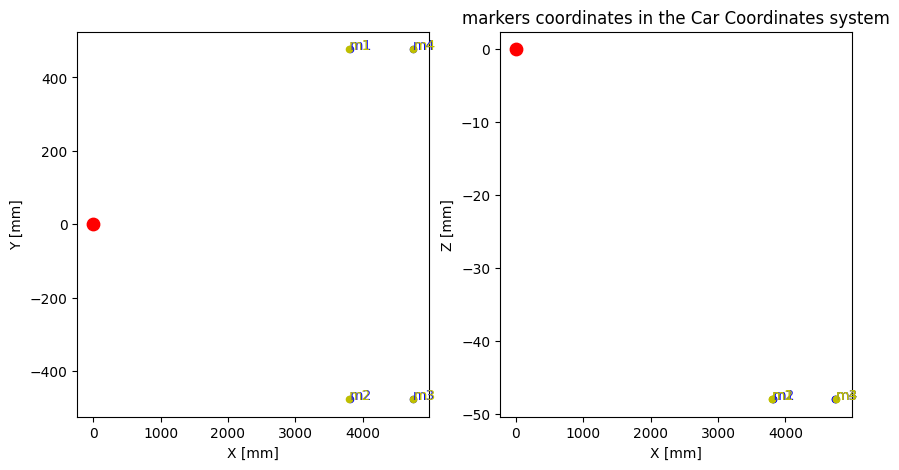

In [5]:
# distance between the board and R_car
d_board_R_car_mm = 3775

# Transform the markers 3D to R_car

markers3D_blue_R_car_mm = np.asarray(markers3D_blue_R_b_mm)
markers3D_ir_R_car_mm = np.asarray(markers3D_ir_R_b_mm)

markers3D_blue_R_car_mm[:,0] = (markers3D_blue_R_car_mm[:,0]+d_board_R_car_mm)
markers3D_blue_R_car_mm[:,1] = markers3D_blue_R_car_mm[:,1]
markers3D_ir_R_car_mm[:,0] = (markers3D_ir_R_car_mm[:,0]+d_board_R_car_mm)
markers3D_ir_R_car_mm[:,1] = markers3D_ir_R_car_mm[:,1]

print('markers3D_blue_R_car_mm')
print(markers3D_blue_R_car_mm)
print('markers3D_ir_R_car_mm')
print(markers3D_ir_R_car_mm)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# top view
ax1.scatter(0, 0, s=80, c='r')
ax2.scatter(0, 0, s=80, c='r')
ax1.set_xlabel('X [mm]')
ax1.set_ylabel('Y [mm]')
ax2.set_xlabel('X [mm]')
ax2.set_ylabel('Z [mm]')
plot_markers(markers3D_blue_R_car_mm, ax1, ax2)
plot_markers(markers3D_ir_R_car_mm, ax1, ax2, color='y')
plt.title('markers coordinates in the Car Coordinates system')

In [6]:
# recompute the external camera alignment

# RGB camera internal calibration
cam_matrix = np.array([ [2.364848439526095e+03, 0, 2.061027556730834e+03],
                        [0, 2.368947953075367e+03, 1.517101795295226e+03],
                        [0, 0, 1] ], dtype="double")

dist_coeffs = np.array([-0.133514963578564, 0.098078521676362, 0, 0, 0.010993238502206], dtype="double")

markers2D = np.array([[2399,2101],
                      [1914,2092],
                      [1958,1916],
                      [2363,1921]], dtype="double")

ret, rvecs_ext_cam_new, tvecs_ext_cam_new = cv2.solvePnP(markers3D_blue_R_car_mm, markers2D, cam_matrix, dist_coeffs, flags=0)

In [7]:
ext_cam_alignment_image_file = r"F:\maxdrogi test\Session2024-10-01_13-17-28_\rgbImage.ppm"
ext_cam_image = cv2.imread(ext_cam_alignment_image_file)

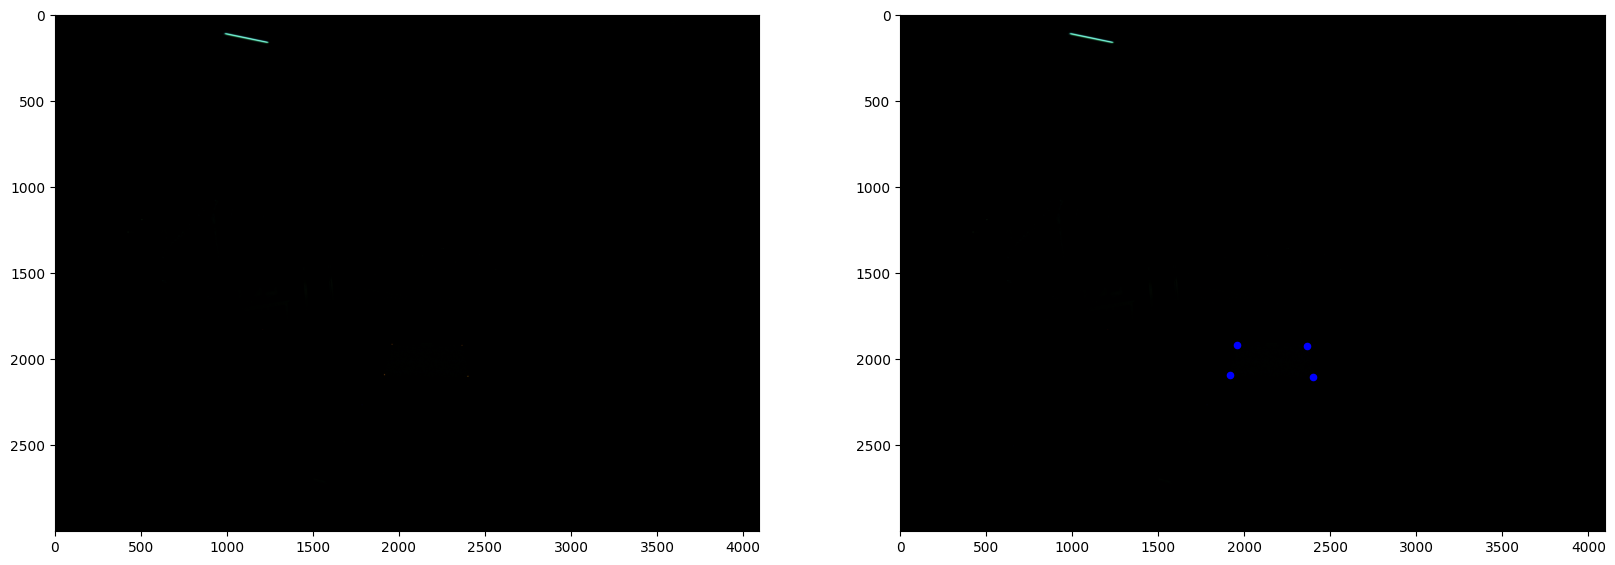

In [8]:
# project the markers 3D blue to external camera image space using XenoWare transform

markers3D_blue_projected, jacobian = cv2.projectPoints(markers3D_blue_R_car_mm[:,0:3], rvecs_ext_cam_new, tvecs_ext_cam_new, cam_matrix, dist_coeffs)

# project the markers 3D ir to external camera image space using XenoWare transform

#markers3D_ir_projected, jacobian = cv2.projectPoints(markers3D_ir_R_car_mm[:,0:3], rvecs_ext_cam_new, tvecs_ext_cam_new, cam_matrix, dist_coeffs)

# plot the 3D-2D projection
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(ext_cam_image)
ax2.scatter(markers3D_blue_projected[:,0,0],markers3D_blue_projected[:,0,1],s=20,c='b')
ax2.imshow(ext_cam_image)

In [9]:
R_ext_cam_new, jc = cv2.Rodrigues(rvecs_ext_cam_new)

In [10]:
print(R_ext_cam_new)
print(tvecs_ext_cam_new)

[[ 0.04920205  0.99878537  0.00263393]
 [-0.21233801  0.00788326  0.97716448]
 [ 0.97595683 -0.04863778  0.21246797]]
[[-9.54412703e-01]
 [ 1.99536095e+03]
 [ 9.11426075e+02]]


In [11]:
tvecs_ext_cam_new.shape

(3, 1)

In [12]:
import numpy as np

def write_xext_file(file_path, R, t):
    array = np.array([R[0,0],R[0,1],R[0,2],R[1,0],R[1,1],R[1,2],R[2,0],R[2,1],R[2,2],t[0,0],t[1,0],t[2,0]])
    f = open(file_path, mode='wb')
    f.write(array.tobytes())
    f.close()

file_path = r"F:\maxdrogi test\Session2024-10-01_13-17-28_\Calibration\xw3d_extcam_1.xext"

write_xext_file(file_path=file_path, R=R_ext_cam_new, t=tvecs_ext_cam_new)

In [13]:
import numpy as np

def write_xext_file(file_path, R, t):
    array = np.array([R[0,0],R[0,1],R[0,2],R[1,0],R[1,1],R[1,2],R[2,0],R[2,1],R[2,2],t[0,0],t[1,0],t[2,0]])
    f = open(file_path, mode='wb')
    f.write(array.tobytes())
    f.close()

In [ ]:
'''
X-direction is along the profile, so pointing from left to right (our y-axis),
Y-axis is the driving direction.
Z-axis is up.
So I think we need:
[[0 1 0]
[1 0 0]
[0 0 -1]]
'''

In [20]:
R = np.array(  [[0, 1, 0],
                [1, 0, 0],
                [0, 0, -1]] , dtype=np.float64)
t = np.array([490, -760, -330], dtype=np.float64).reshape((3,1))

file_path = r"F:\maxdrogi test\Session2024-10-01_13-17-28_\Calibration\xenoline_0.xext"

write_xext_file(file_path=file_path, R=R, t=t)

In [21]:
xl0_alignment_R, xl0_alignment_t = read_xext_file(file_path)

print(xl0_alignment_R)

print(xl0_alignment_t)

[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0. -1.]]
[[ 490.]
 [-760.]
 [-330.]]


In [15]:
lmi_profile = np.array([[-500,0,-50],[-450,0,-50],[-400,0,-50],[-350,0,-50],[-300,0,-50],[-200,0,-50],[-100,0,-50],[0,0,-50],
                            [500,0,-50],[450,0,-50],[400,0,-50]])

In [17]:
R.shape

(3, 3)